In [6]:
pip install tpot


In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import csv

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn import svm #SVM
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.tree import DecisionTreeClassifier #决策树
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB #高斯朴素贝叶斯 GaussianNB/MultinomialNB/BernoulliNB
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import  AdaBoostClassifier #AdaBoost
from xgboost import XGBClassifier #XGBoost
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold
# 使用TPOT自动机器学习工具对MNIST进行分类
from tpot import TPOTClassifier


Import data (see data overview)

In [8]:
Rate_train = pd.read_csv("train.csv")
Rate_test = pd.read_csv("test.csv")
Full_data = Rate_train.append(Rate_test)
Full_data = Full_data.drop(["EmployeeNumber", "EmployeeCount", "Over18", "StandardHours"],axis=1)
Full_data = pd.get_dummies(Full_data,dummy_na=True)
train_clean = Full_data.iloc[:1175,:]
train_clean = train_clean.drop(['Attrition_No', 'Attrition_nan','BusinessTravel_nan','EducationField_nan','Department_nan','Gender_nan','JobRole_nan','MaritalStatus_nan','OverTime_nan'],axis=1)
train_clean.info()
test_clean = Full_data.iloc[1175:,:]
test_clean = test_clean.drop(['Attrition_No', 'Attrition_Yes','Attrition_nan','BusinessTravel_nan','EducationField_nan','Department_nan','Gender_nan','JobRole_nan','MaritalStatus_nan','OverTime_nan'],axis=1)
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1175 entries, 0 to 1174
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1175 non-null   int64
 1   Age                                1175 non-null   int64
 2   DailyRate                          1175 non-null   int64
 3   DistanceFromHome                   1175 non-null   int64
 4   Education                          1175 non-null   int64
 5   EnvironmentSatisfaction            1175 non-null   int64
 6   HourlyRate                         1175 non-null   int64
 7   JobInvolvement                     1175 non-null   int64
 8   JobLevel                           1175 non-null   int64
 9   JobSatisfaction                    1175 non-null   int64
 10  MonthlyIncome                      1175 non-null   int64
 11  MonthlyRate                        1175 non-null   int64
 12  NumCompaniesWorked  

A simple prediction

In [0]:
Y = train_clean['Attrition_Yes']
X = train_clean.drop(['Attrition_Yes'],axis=1)
# split data，25% is used to test，the rest is used to train
train_x, test_x, train_y, test_y = train_test_split( X, Y, test_size=0.25, random_state=33 )
train_x = train_x.astype( np.float )
test_x = test_x.astype( np.float )
train_y = train_y.astype( np.float )
test_y = test_y.astype( np.float )

# using Z-Score regularization
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform( train_x )
test_ss_x = ss.transform( test_x )

# import test_clean
test_ss_test = ss.transform( test_clean )

In [12]:
# creating tpot classifier
tpot = TPOTClassifier( generations=5, population_size=20, verbosity=2 )
tpot.fit( train_ss_x, train_y )
predict_y_tpot = tpot.predict( test_ss_x )##-- A Comparison Test --##

#print( 'SVM accuracy rate: %0.4lf' % accuracy_score( test_y, predict_y ) )
scoretemp = roc_auc_score(test_y,predict_y_tpot)
print(scoretemp)

#apply the model on the test_clean data
predict_test = tpot.predict( test_ss_test )# 0 and 1
#temp_prob = tpot.predict_proba( test_ss_test )
print(predict_test)

Generation 1 - Current best internal CV score: 0.8774139702105804
Generation 2 - Current best internal CV score: 0.8774139702105804
Generation 3 - Current best internal CV score: 0.8785503338469439
Generation 4 - Current best internal CV score: 0.8785503338469439
Generation 5 - Current best internal CV score: 0.8785503338469439

Best pipeline: LinearSVC(input_matrix, C=5.0, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05)
0.6577840112201964
[0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [13]:
# creating LR classifier
lr = LogisticRegression()
clf = lr.fit( train_ss_x, train_y )
predict_y_lr = clf.predict( test_ss_x )##-- A Comparison Test --##

#auc score of the test part in train_clean
scoretemp = roc_auc_score(test_y,predict_y_lr)
print(scoretemp)

#apply the model on the test_clean data
predict_test = clf.predict( test_ss_test )# 0 and 1
temp_prob = clf.predict_proba( test_ss_test )
print(temp_prob)

0.6706697054698457
[[6.63378574e-01 3.36621426e-01]
 [9.47874615e-01 5.21253848e-02]
 [9.14789691e-01 8.52103087e-02]
 [4.05825052e-01 5.94174948e-01]
 [9.36689571e-01 6.33104289e-02]
 [2.00045329e-01 7.99954671e-01]
 [9.75724997e-01 2.42750028e-02]
 [6.08541871e-01 3.91458129e-01]
 [9.81295496e-01 1.87045044e-02]
 [9.99660775e-01 3.39225071e-04]
 [6.65023321e-01 3.34976679e-01]
 [9.55057681e-01 4.49423194e-02]
 [7.33686082e-01 2.66313918e-01]
 [9.85394313e-01 1.46056870e-02]
 [4.61126813e-01 5.38873187e-01]
 [9.40436954e-01 5.95630457e-02]
 [9.89824055e-01 1.01759446e-02]
 [8.76818972e-01 1.23181028e-01]
 [9.68557998e-01 3.14420021e-02]
 [9.92799355e-01 7.20064466e-03]
 [8.21866778e-01 1.78133222e-01]
 [8.94065060e-01 1.05934940e-01]
 [9.92357117e-01 7.64288260e-03]
 [9.91260316e-01 8.73968421e-03]
 [9.64473778e-01 3.55262225e-02]
 [2.18653003e-01 7.81346997e-01]
 [4.38208409e-01 5.61791591e-01]
 [9.41174585e-01 5.88254153e-02]
 [9.78287478e-01 2.17125220e-02]
 [2.36270514e-01 7.63729

In [15]:
# creating CART classifier
clf = DecisionTreeClassifier()
clf.fit( train_ss_x, train_y )
predict_y_cart = clf.predict( test_ss_x )##-- A Comparison Test --##

#auc score of the test part in train_clean
scoretemp = roc_auc_score(test_y,predict_y_cart)
print(scoretemp)
#apply the model on the test_clean data
predict_test = clf.predict( test_ss_test )# 0 and 1
#temp_prob = clf.predict_proba( test_ss_test )
print(predict_test)

0.5739831697054698
[0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0.]


In [16]:
# creating svm classifier
model = svm.SVC( kernel='rbf', C=1.0, gamma='auto',probability=True)
model.fit( train_ss_x, train_y )
predict_y_svm = model.predict( test_ss_x )##-- A Comparison Test --##

#auc score of the test part in train_clean
scoretemp = roc_auc_score(test_y,predict_y_svm)
print(scoretemp)

#apply the model on the test_clean data
predict_test = model.predict( test_ss_test )# 0 and 1
#temp_prob = model.predict_proba( test_ss_test )
print(predict_test)

0.5849403927068723
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0.]


In [17]:
# creating knn classifier
model = KNeighborsClassifier()
model.fit( train_ss_x, train_y )
predict_y_knn = model.predict( test_ss_x )##-- A Comparison Test --##

#auc score of the test part in train_clean
scoretemp = roc_auc_score(test_y,predict_y_knn)
print(scoretemp)

#apply the model on the test_clean data
predict_test = model.predict( test_ss_test )# 0 and 1
#temp_prob = model.predict_proba( test_ss_test )
print(predict_test)

0.6175490883590463
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0.]


In [18]:
# creating Adaboost classifier
dt_stump = DecisionTreeClassifier( max_depth=5, min_samples_leaf=1 )
dt_stump.fit( train_ss_x, train_y )
# dt_stump_err = 1.0-dt_stump.score(test_x, test_y)
# 设置AdaBoost迭代次数
n_estimators = 500
model = AdaBoostClassifier( base_estimator=dt_stump, n_estimators=n_estimators )
model.fit( train_ss_x, train_y )
predict_y_ada = model.predict( test_ss_x )##-- A Comparison Test --##

#print( 'SVM accuracy rate: %0.4lf' % accuracy_score( test_y, predict_y ) )
scoretemp = roc_auc_score(test_y,predict_y_ada)
print(scoretemp)

#apply the model on the test_clean data
predict_test = model.predict( test_ss_test )# 0 and 1
#temp_prob = model.predict_proba( test_ss_test )
print(predict_test)

0.5978260869565217
[1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [19]:
# creating xgboost classifier
model = XGBClassifier()
model.fit( train_ss_x, train_y )
predict_y_xgb = model.predict( test_ss_x )##-- A Comparison Test --##

#print( 'SVM accuracy rate: %0.4lf' % accuracy_score( test_y, predict_y ) )
scoretemp = roc_auc_score(test_y,predict_y_xgb)
print(scoretemp)

#apply the model on the test_clean data
predict_test = model.predict( test_ss_test )# 0 and 1
#temp_prob = model.predict_proba( test_ss_test )
print(predict_test)

0.6094845722300141
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [20]:
# creating tpot classifier
tpot = TPOTClassifier( generations=5, population_size=20, verbosity=2 )
tpot.fit( train_ss_x, train_y )
predict_y_tpot2 = model.predict( test_ss_x )##-- A Comparison Test --##

#print( 'SVM accuracy rate: %0.4lf' % accuracy_score( test_y, predict_y ) )
scoretemp = roc_auc_score(test_y,predict_y_tpot2)
print(scoretemp)

#apply the model on the test_clean data
predict_test = model.predict( test_ss_test )# 0 and 1
#temp_prob = model.predict_proba( test_ss_test )
print(predict_test)

Generation 1 - Current best internal CV score: 0.8694786851566512
Generation 2 - Current best internal CV score: 0.876271186440678
Generation 3 - Current best internal CV score: 0.876271186440678
Generation 4 - Current best internal CV score: 0.876271186440678
Generation 5 - Current best internal CV score: 0.8774268104776579

Best pipeline: GradientBoostingClassifier(BernoulliNB(LogisticRegression(input_matrix, C=10.0, dual=False, penalty=l2), alpha=0.001, fit_prior=False), learning_rate=1.0, max_depth=4, max_features=0.9500000000000001, min_samples_leaf=16, min_samples_split=15, n_estimators=100, subsample=0.8500000000000001)
0.6094845722300141
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [24]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.utils import shuffle
# creating gdbt classifier
clf = GradientBoostingRegressor(n_estimators=500, learning_rate=0.01,max_depth=4,min_samples_split=2,loss='ls')
clf.fit( train_ss_x, train_y )
predict_y_gdbt = clf.predict( test_ss_x )##-- A Comparison Test --##

#print( 'SVM accuracy rate: %0.4lf' % accuracy_score( test_y, predict_y ) )
scoretemp = roc_auc_score(test_y,predict_y_gdbt)
print(scoretemp)

#apply the model on the test_clean data
predict_test = clf.predict( test_ss_test )# 0 and 1
#temp_prob = clf.predict_proba( test_ss_test )
print(predict_test)

0.7885694249649369
[ 3.41510546e-01  7.77911673e-02  4.77940536e-02  2.51779493e-01
  1.41486916e-01  1.02570426e+00  6.08430076e-01  4.44730879e-01
  3.14934975e-02  2.06883296e-02  9.17181107e-02  1.07061076e-01
  9.29582857e-02  9.87669637e-03  6.03834263e-01  1.60418658e-01
 -1.10668084e-02  8.30159936e-02  1.48889662e-01  2.62184870e-02
  3.71972638e-02  3.85717118e-01  8.96325464e-02  3.30751330e-02
  1.76439057e-02  3.27600862e-01  3.87312601e-01  3.22590522e-02
  3.65867510e-02  5.40554510e-01  4.10093407e-02 -1.85415081e-02
 -5.28488988e-03  1.67117498e-01  1.30962745e-01  1.73821741e-01
  1.12239626e-01  7.81728658e-02  8.49832744e-02  6.47019142e-02
  1.53440838e-01  1.15107222e-01  1.40549003e-02  2.52944098e-02
  1.94446328e-01  6.57099488e-02  5.22721644e-01  2.83465944e-01
  6.09680974e-03  7.10008595e-01  5.51007006e-01  3.82629961e-01
  4.10913350e-01  1.64917879e-01  1.10812966e-01  5.78994183e-01
  1.13140659e-01  6.03098960e-03  8.97531284e-02  3.63839860e-02
  4.30

In [29]:
# creating randomforest-lr classifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
# 已经将样本集分成测试集和训练集，再将训练集拆成两个部分（GBDT/RF，LR）
X_train, X_train_lr, y_train, y_train_lr = train_test_split(train_ss_x, train_y, test_size=0.5)

# 基于随机森林的监督变换
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf.fit(X_train, y_train)
# 得到OneHot编码
rf_enc = OneHotEncoder(categories='auto')
rf_enc.fit(rf.apply(X_train))
# 使用OneHot编码作为特征，训练LR
rf_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)
# 使用LR进行预测
#y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(test_ss_x)))[:, 1]
#fpr_rf_lm, tpr_rf_lm, _ = roc_curve(test_y, y_pred_rf_lm)
y_pred_rf_lm = rf_lm.predict(rf_enc.transform(rf.apply(test_ss_x)))
scoretemp = roc_auc_score(test_y,y_pred_rf_lm)
print('Random Forest: ',scoretemp)
#apply the model on the test_clean data
predict_test = rf_lm.predict( rf_enc.transform(rf.apply(test_ss_test)) )# 0 and 1
#temp_prob = rf_lm.predict_proba( test_ss_test )
print(predict_test)


Random Forest:  0.6054523141654978
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [36]:
# creating gdbt-lr classifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomTreesEmbedding, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.pipeline import make_pipeline

n_estimator = 10
# 已经将样本集分成测试集和训练集，再将训练集拆成两个部分（GBDT/RF，LR）
X_train, X_train_lr, y_train, y_train_lr = train_test_split(train_ss_x, train_y, test_size=0.5)

# 基于GBDT监督变换
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd.fit(X_train, y_train)
# 得到OneHot编码
grd_enc = OneHotEncoder(categories='auto')

#temp = grd.apply(X_train)
np.set_printoptions(threshold=np.inf)  
grd_enc.fit(grd.apply(X_train)[:, :, 0])
#print(grd_enc.get_feature_names()) # 查看每一列对应的特征
# 使用OneHot编码作为特征，训练LR
grd_lm = LogisticRegression(solver='lbfgs', max_iter=1000)
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)
# 使用LR进行预测
#y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(test_ss_x)[:, :, 0]))[:, 1]
#fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)
y_pred_grd_lm = grd_lm.predict(grd_enc.transform(grd.apply(test_ss_x)[:, :, 0]))
#[:, 1]
scoretemp = roc_auc_score(test_y,y_pred_grd_lm)
print('Random Forest: ',scoretemp)
#apply the model on the test_clean data
predict_test = grd_lm.predict( grd_enc.transform(grd.apply(test_ss_test)[:, :, 0]) )# 0 and 1
#temp_prob = grd_lm.predict_proba( grd_enc.transform(grd.apply(test_ss_test)[:, :, 0]) )
print(predict_test)

Random Forest:  0.5994039270687237
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0.]


In [37]:
# creating LightGBM classifier
import pandas as pd
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)

#print(train['Attrition'].value_counts())
# 处理Attrition字段
train['Attrition']=train['Attrition'].map(lambda x:1 if x=='Yes' else 0)
from sklearn.preprocessing import LabelEncoder
# 查看数据是否有空值
#print(train.isna().sum())

# 去掉没用的列 员工号码，标准工时（=80）
train = train.drop(['EmployeeNumber', 'StandardHours'], axis=1)
test = test.drop(['EmployeeNumber', 'StandardHours'], axis=1)

# 对于分类特征进行特征值编码
attr=['Age','BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
lbe_list=[]
for feature in attr:
    lbe=LabelEncoder()
    train[feature]=lbe.fit_transform(train[feature])
    test[feature]=lbe.transform(test[feature])
    lbe_list.append(lbe)
#train.to_csv('temp.csv')
#print(train)

import lightgbm as lgb
from sklearn.model_selection import train_test_split
# param = {
#     'num_leaves':41,
#     'boosting_type': 'gbdt',
#     'objective':'binary',
#     'max_depth':15,
#     'learning_rate':0.001,
#     'metric':'binary_logloss'}
param = {'boosting_type':'gbdt',
                         'objective' : 'binary', #
                         #'metric' : 'binary_logloss',
                         'metric' : 'auc',
#                          'metric' : 'self_metric',
                         'learning_rate' : 0.01,
                         'max_depth' : 15,
                         'feature_fraction':0.8,
                         'bagging_fraction': 0.9,
                         'bagging_freq': 8,
                         'lambda_l1': 0.6,
                         'lambda_l2': 0,
#                          'scale_pos_weight':k,
#                         'is_unbalance':True
        }
X_train, X_valid, y_train, y_valid = train_test_split(train.drop('Attrition',axis=1), train['Attrition'], test_size=0.2, random_state=42)
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_valid, label=y_valid)


model = lgb.train(param,train_data,valid_sets=[train_data,valid_data],num_boost_round = 10000 ,early_stopping_rounds=200,verbose_eval=25, categorical_feature=attr)
predict=model.predict(test)
#print(predict)
test['Attrition']=predict
test['Attrition']=test['Attrition'].map(lambda x:1 if x>=0.5 else 0)
#test['Attrition']=predict
test[['Attrition']].to_csv('submit_lgb.csv')



/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['Age', 'BusinessTravel', 'Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 200 rounds.
[25]	training's auc: 0.928583	valid_1's auc: 0.752319
[50]	training's auc: 0.946443	valid_1's auc: 0.782277
[75]	training's auc: 0.961783	valid_1's auc: 0.799302
[100]	training's auc: 0.9716	valid_1's auc: 0.801048
[125]	training's auc: 0.978094	valid_1's auc: 0.812179
[150]	training's auc: 0.983501	valid_1's auc: 0.813926
[175]	training's auc: 0.987875	valid_1's auc: 0.822438
[200]	training's auc: 0.990929	valid_1's auc: 0.821674
[225]	training's auc: 0.993794	valid_1's auc: 0.821565
[250]	training's auc: 0.995563	valid_1's auc: 0.824512
[275]	training's auc: 0.996838	valid_1's auc: 0.824512
[300]	training's auc: 0.997934	valid_1's auc: 0.822765
[325]	training's auc: 0.998635	valid_1's auc: 0.825712
[350]	training's auc: 0.999003	valid_1's auc: 0.824948
[375]	training's auc: 0.999228	valid_1's auc: 0.827567
[400]	training's auc: 0.999497	valid_1's auc: 0.826913
[425]	training's auc: 0.999659	valid_1's auc: 0.826367
[450]	t

In [39]:
!pip install catboost
# creating CatBoost classifier
import pandas as pd
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)

#print(train['Attrition'].value_counts())
# 处理Attrition字段
train['Attrition']=train['Attrition'].map(lambda x:1 if x=='Yes' else 0)
from sklearn.preprocessing import LabelEncoder
# 查看数据是否有空值
#print(train.isna().sum())

# 去掉没用的列 员工号码，标准工时（=80）
train = train.drop(['EmployeeNumber', 'StandardHours'], axis=1)
test = test.drop(['EmployeeNumber', 'StandardHours'], axis=1)

# 对于分类特征进行特征值编码
attr=['Age','BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
lbe_list=[]
for feature in attr:
    lbe=LabelEncoder()
    train[feature]=lbe.fit_transform(train[feature])
    test[feature]=lbe.transform(test[feature])
    lbe_list.append(lbe)
#print(train)

import catboost as cb
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop('Attrition',axis=1), train['Attrition'], test_size=0.2, random_state=42)

model = cb.CatBoostClassifier(iterations=1000, 
                              depth=7, 
                              learning_rate=0.01, 
                              loss_function='Logloss', 
                              eval_metric='AUC',
                              logging_level='Verbose', 
                              metric_period=50
                             )

# 得到分类特征的列号
categorical_features_indices = []
for i in range(len(X_train.columns)):
    if X_train.columns.values[i] in attr:
        categorical_features_indices.append(i)
print(categorical_features_indices)

model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=categorical_features_indices)

#model = cb.train(param, train_data, evals=[(train_data, 'train'), (valid_data, 'valid')], num_boost_round = 10000, early_stopping_rounds=200, verbose_eval=25)
predict = model.predict(test)
#predict = model.predict_proba(test)
#print(predict)
test['Attrition']=predict
## 转化为二分类输出
#test['Attrition']=test['Attrition'].map(lambda x:1 if x>=0.5 else 0)
#test[['Attrition']].to_csv('submit_cb.csv')
test[['Attrition']]


     |████████████████████████████████| 64.4MB 79kB/s 
[0, 1, 3, 5, 6, 9, 13, 15, 19, 20]
0:	test: 0.6390374	best: 0.6390374 (0)	total: 52.5ms	remaining: 52.5s
50:	test: 0.7998472	best: 0.7998472 (50)	total: 420ms	remaining: 7.82s
100:	test: 0.8054131	best: 0.8054131 (100)	total: 755ms	remaining: 6.72s
150:	test: 0.8053039	best: 0.8054131 (100)	total: 1.21s	remaining: 6.79s
200:	test: 0.8075958	best: 0.8075958 (200)	total: 1.7s	remaining: 6.75s
250:	test: 0.8062862	best: 0.8075958 (200)	total: 2.17s	remaining: 6.48s
300:	test: 0.8045400	best: 0.8075958 (200)	total: 2.62s	remaining: 6.09s
350:	test: 0.8059587	best: 0.8075958 (200)	total: 3.05s	remaining: 5.63s
400:	test: 0.8065044	best: 0.8075958 (200)	total: 3.5s	remaining: 5.22s
450:	test: 0.8065044	best: 0.8075958 (200)	total: 3.97s	remaining: 4.83s
500:	test: 0.8077049	best: 0.8077049 (500)	total: 4.47s	remaining: 4.45s
550:	test: 0.8090145	best: 0.8090145 (550)	total: 4.92s	remaining: 4.01s
600:	test: 0.8106515	best: 0.8106515 (600

,Attrition
user_id,
442,0
1091,0
981,0
785,0
1332,1
...,...
1439,0
481,0
124,0


In [41]:
!pip install ngboost
# creating NGBoost classifier
import pandas as pd
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)

#print(train['Attrition'].value_counts())
# 处理Attrition字段
train['Attrition']=train['Attrition'].map(lambda x:1 if x=='Yes' else 0)
from sklearn.preprocessing import LabelEncoder
# 查看数据是否有空值
#print(train.isna().sum())

# 去掉没用的列 员工号码，标准工时（=80）
train = train.drop(['EmployeeNumber', 'StandardHours'], axis=1)
test = test.drop(['EmployeeNumber', 'StandardHours'], axis=1)

# 对于分类特征进行特征值编码
attr=['Age','BusinessTravel','Department','Education','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
lbe_list=[]
for feature in attr:
    lbe=LabelEncoder()
    train[feature]=lbe.fit_transform(train[feature])
    test[feature]=lbe.transform(test[feature])
    lbe_list.append(lbe)
#print(train)

import ngboost as ng
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train.drop('Attrition',axis=1), train['Attrition'], test_size=0.2, random_state=42)

model = ng.NGBClassifier(n_estimators=1000, 
                              learning_rate=0.01, 
                              verbose=True, 
                              verbose_eval=50
                             )


model.fit(X_train, y_train)

#predict = model.predict(test)
predict = model.predict_proba(test)[:, 1]
#print(predict)
test['Attrition']=predict
## 转化为二分类输出
test['Attrition']=test['Attrition'].map(lambda x:1 if x>=0.5 else 0)
test[['Attrition']]
#test[['Attrition']].to_csv('submit_ngb.csv')



     |████████████████████████████████| 327kB 7.8MB/s 
[iter 0] loss=0.4190 val_loss=0.0000 scale=1.0000 norm=2.0000
[iter 50] loss=0.3427 val_loss=0.0000 scale=1.0000 norm=1.7212
[iter 100] loss=0.3005 val_loss=0.0000 scale=1.0000 norm=1.6308
[iter 150] loss=0.2782 val_loss=0.0000 scale=1.0000 norm=1.5989
[iter 200] loss=0.2683 val_loss=0.0000 scale=1.0000 norm=1.5975
[iter 250] loss=0.2606 val_loss=0.0000 scale=1.0000 norm=1.5968
[iter 300] loss=0.2531 val_loss=0.0000 scale=1.0000 norm=1.5853
[iter 350] loss=0.2493 val_loss=0.0000 scale=0.5000 norm=0.7903
[iter 400] loss=0.2464 val_loss=0.0000 scale=1.0000 norm=1.5743
[iter 450] loss=0.2439 val_loss=0.0000 scale=0.5000 norm=0.7862
[iter 500] loss=0.2421 val_loss=0.0000 scale=0.0312 norm=0.0491
[iter 550] loss=0.2408 val_loss=0.0000 scale=1.0000 norm=1.5703
[iter 600] loss=0.2405 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 650] loss=0.2402 val_loss=0.0000 scale=0.0002 norm=0.0004
[iter 700] loss=0.2402 val_loss=0.0000 scale=0.0002 

,Attrition
user_id,
442,0
1091,0
981,0
785,0
1332,1
...,...
1439,0
481,0
124,0


Now, we put all the predict_y together with the true result test_y using line-graph.

In [0]:
P_y = [test_y, predict_y_lr,predict_y_cart,predict_y_svm,predict_y_knn,predict_y_ada,predict_y_xgb,predict_y_tpot,predict_y_tpot2,predict_y_gdbt,y_pred_rf_lm,y_pred_grd_lm]

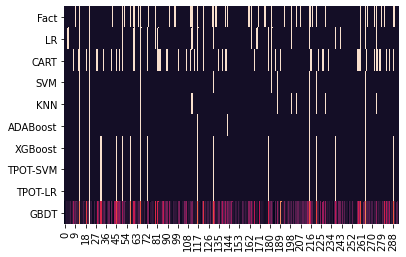

In [0]:
sns.heatmap(P_y,yticklabels=['Fact','LR','CART','SVM','KNN','ADABoost','XGBoost','TPOT-SVM','TPOT-LR','GBDT'],cbar=False)

***please ignore the keras_pandas part*** 
(this part is the process using keras but failed because of version updated. Since I learn somethig from it and not oganize them yet, I will delete this part as aoon as I finish the Deep Learning repo.)

In [0]:
pip install keras_pandas

     |████████████████████████████████| 40kB 2.6MB/s 
     |████████████████████████████████| 317kB 9.9MB/s 
     |████████████████████████████████| 8.9MB 24.4MB/s 
     |████████████████████████████████| 5.3MB 9.4MB/s 
     |████████████████████████████████| 61kB 8.5MB/s 
     |████████████████████████████████| 2.8MB 25.2MB/s 
     |████████████████████████████████| 63.0MB 70kB/s 
     |████████████████████████████████| 13.9MB 346kB/s 
     |████████████████████████████████| 61kB 8.6MB/s 
     |████████████████████████████████| 573kB 43.6MB/s 
     |████████████████████████████████| 3.0MB 38.1MB/s 
  Created wheel for m2r: filename=m2r-0.2.1-cp36-none-any.whl size=10538 sha256=87250e6fb904f598c2d7f6e5a11aa51c8addb15e426b915873ab6b4198283837
  Stored in directory: /root/.cache/pip/wheels/47/f8/dc/80f56bc4abf785834d422c2f5c864a14bf34576612aeb03492
Successfully built m2r
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.23.4 which is incompatible.
ERROR: xarray 

In [0]:
pip install sklearn

In [0]:
# keras

import keras
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras import Model
from keras_pandas import lib
from keras_pandas.Automater import Automater

observations = train_clean
# Transform the data set, using keras_pandas
numerical_vars = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
                  'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate',
                  'NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction',
                  'StockOptionLevelv','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance',
                  'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager',
                  'BusinessTravel_Non-Travel','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely',
                  'Department_Human Resources ','Department_Research & Development','Department_Sales',
                  'EducationField_Human Resources','EducationField_Life Sciences','EducationField_Marketing',
                  'EducationField_Medical','EducationField_Other','EducationField_Technical Degree',
                  'Gender_Female','Gender_Male','JobRole_Healthcare Representative','JobRole_Human Resources',
                  'JobRole_Laboratory Technician','JobRole_Manager','JobRole_Manufacturing Director',
                  'JobRole_Research Director','JobRole_Research Scientist','JobRole_Sales Executive',
                  'JobRole_Sales Representative','MaritalStatus_Divorced','MaritalStatus_Married',
                  'MaritalStatus_Single','OverTime_No','OverTime_Yes']

auto = Automater({numerical_vars}, output_var='Attrition_Yes')
X, y = auto.fit_transform(observations)

# Start model with provided input nub
x = auto.input_nub

# Fill in your own hidden layers
x = Dense(32)(x)
x = Dense(32, activation='relu')(x)
x = Dense(32)(x)

# End model with provided output nub
x = auto.output_nub(x)

model = Model(inputs=auto.input_layers, outputs=x)
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(X, y, epochs=4, validation_split=.2)

# 创建序贯模型

model = Sequential()

# 第一层卷积层：6个卷积核，大小为5∗5, relu激活函数

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))

# 第二层池化层：最大池化

model.add(MaxPooling2D(pool_size=(2, 2)))

# 第三层卷积层：16个卷积核，大小为5*5，relu激活函数

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))

# 第二层池化层：最大池化

model.add(MaxPooling2D(pool_size=(2, 2)))

# 将参数进行扁平化，在LeNet5中称之为卷积层，实际上这一层是一维向量，和全连接层一样

model.add(Flatten())

model.add(Dense(120, activation='relu'))

# 全连接层，输出节点个数为84个

model.add(Dense(84, activation='relu'))

# 输出层 用softmax 激活函数计算分类概率

model.add(Dense(10, activation='softmax'))

# 设置损失函数和优化器配置

model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# 传入训练数据进行训练

model.fit(train_x, train_y, batch_size=128, epochs=2, verbose=1, validation_data=(test_x, test_y))

# 对结果进行评估

score = model.evaluate(test_x, test_y)

print('误差:%0.4lf' %score[0])

print('准确率:', score[1])



k-fold